In [10]:
# Collect Data
# 1. Ticker 
# 2. Board
# https://pythonprogramming.net/candlestick-ohlc-graph-matplotlib-tutorial/
import Test_bitflyer as bf
import matplotlib.pyplot as plt
import matplotlib.dates as md

from matplotlib.finance import candlestick_ohlc
from datetime import datetime,timedelta
from mongo_db_bitflyer import mongo_db_bitflyer



In [11]:
# for Notebook
%matplotlib notebook

In [12]:
# Draw Charts.
product_code='BTC_JPY' # Bitcoin
start_time=datetime.now()-timedelta(minutes=240) #現在時刻から4時間前
end_time=datetime.now() #現在時刻
bar_range=5 # minutes 5分足

In [13]:
##
## Start Main
##
mdb=mongo_db_bitflyer()
# Show current record number
mdb.ds.count(0)

488462

In [14]:
# Candlestick cart
# Get data from database...
_ohlc_table=mdb.gather_ohlc_data('BTC_JPY',start_time,end_time,bar_range)

<IPython.core.display.Javascript object>


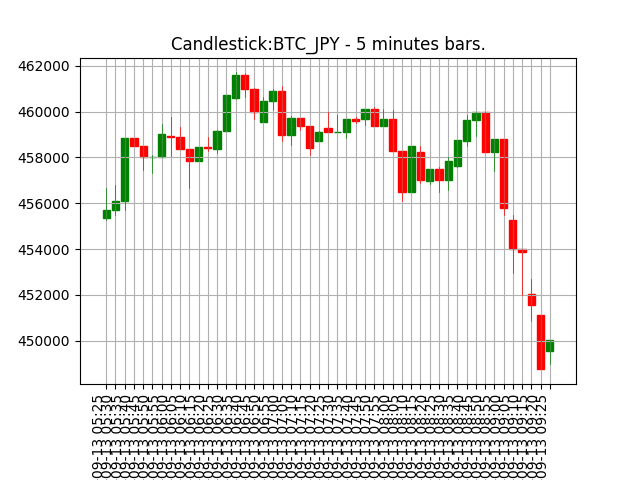

([<matplotlib.lines.Line2D at 0x7f18d47e0a20>,
  <matplotlib.patches.Rectangle at 0x7f18d465a2b0>])

In [15]:
# Draw CandleStick Chart.
# Prepare chart..
fig, ax = plt.subplots()

# set title
plt.title('Candlestick:{0} - {1} minutes bars.'.format(product_code,bar_range))

# setup x-axis for date time values.
dateArray=_ohlc_table[:,0]
plt.xticks(dateArray)
fig.autofmt_xdate(rotation=90)

# setup axis
ax.autoscale(enable=True)
ax.grid(True)
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d %H:%M'))

# The candle bar width can be calcurated based on dates and number of bars.
barWidth = ((max(dateArray)-min(dateArray))/dateArray.shape[0])*0.8 # 0.8 is for margin.

# draw it!
candlestick_ohlc(ax, _ohlc_table,width=barWidth,colorup='g', colordown='r')

In [7]:
# MACD chart
fillcolor = 'darkslategrey' #
nslow = 26
nfast = 12
nema = 9
start_time=datetime.now()-timedelta(minutes=240+nslow*bar_range) #現在時刻から4時間+(MACD slow x 足) 前
end_time=datetime.now() #現在時刻

In [8]:
# Get data from database...
_macd_t,_ema_s,_ema_f,_macd,_signal = mdb.gather_macd_data(product_code,start_time,end_time,bar_range,nslow,nfast,nema)

# _macd_t : タイムスタンプ
# _ema_s : 対数移動平均(slow)
# _ema_f : 対数移動平均(fast)
# _macd : Moving Average Convergence/Divergence 
# _signal: Signal

# このコードでは、グラフに表示するのは、_macd と signal。
# _macd_ma_s,_macd_ma_f は使用しない。一応 None にする。
_ema_s=_ema_f = None

# nslow 項までのデータはグラフの形状を考慮して切り詰める
_macd_t,_macd,_signal=_macd_t[nslow:],_macd[nslow:],_signal[nslow:]

<IPython.core.display.Javascript object>


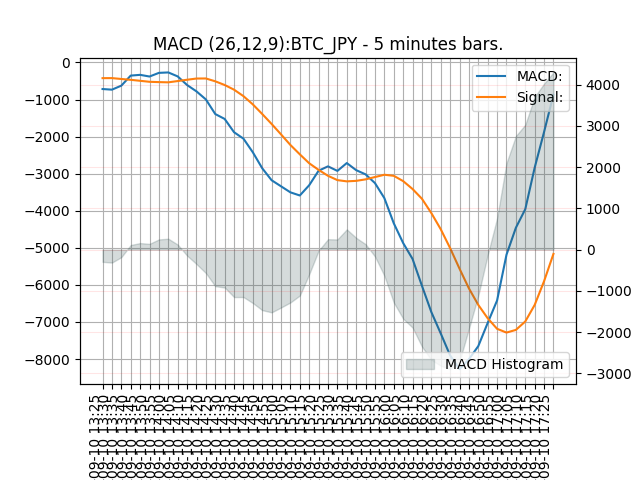

In [9]:
# Prepare chart..
fig2, ax2 = plt.subplots()

# set title
plt.title('MACD ({1},{2},{3}):{0} - {4} minutes bars.'.format(product_code,nslow,nfast,nema,bar_range))

# setup x-axis for date time values.
dateArray=_macd_t
plt.xticks(dateArray)
fig2.autofmt_xdate(rotation=90)

# setup axis
ax2.autoscale(enable=True)
ax2.grid(True)
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d %H:%M'))
#ax.yaxis.

# draw it!
ax2.plot(_macd_t,_macd,label='MACD:')
ax2.plot(_macd_t,_signal,label='Signal:')
ax2.legend(loc=1)

#MACD Histogram
ax2_second=ax2.twinx()
ax2_second.grid(True,color='r',alpha=0.1)
ax2_second.fill_between(_macd_t, _macd - _signal, 0, alpha=0.2, facecolor=fillcolor, edgecolor=fillcolor,label='MACD Histogram')
ax2_second.legend(loc=4)